In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle

In [3]:
filename = 'apnea_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))

In [4]:
x_col = 'Risk%'
testing_data = pd.read_csv('testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['AHI'])

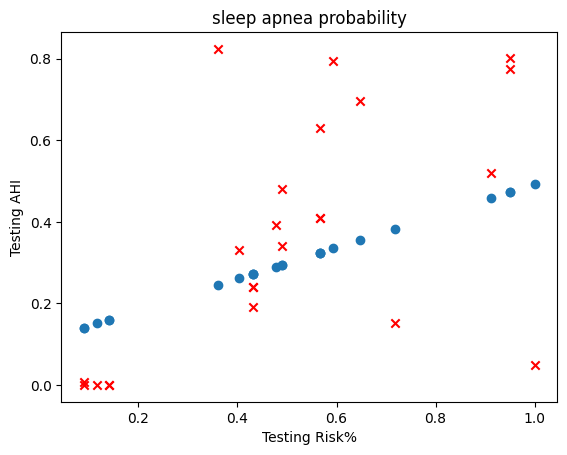

In [5]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("sleep apnea probability")
plt.xlabel(f'Testing {x_col}')
plt.ylabel(f'Testing AHI')
plt.show()

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort x_test for a smooth curve
x_test_sorted = np.sort(x_test, axis=0)
y_test_pred_sorted = model_A.predict(x_test_sorted)

plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test_sorted, y_test_pred_sorted, color='red', label='Polynomial Fit')
plt.legend()
plt.show()

In [ ]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

In [ ]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

In [ ]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')